<a href="https://colab.research.google.com/github/ayassou/Projects-AI-ML/blob/main/ML_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# from sklearn.datasets import load_boston
# load_boston = load_boston()
# x = load_boston.data
# y = load_boston.target
# data = pd.Dataframe(x, columns=load_boston.feature_names)
# data["SalePrice"] = y
# data.head()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", header=None, skiprows= 22)
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
features = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data = pd.DataFrame(features, columns= ["CRIM", " ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
data['Salesprice'] = target
data.head()


# from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing()
# x = housing.data
# y = housing.target
# data = pd.DataFrame(x, columns=housing.feature_names)
# data["SalePrice"] = y
# data.head()
# data1 = pd.DataFrame(y, columns = housing.target_names)
# data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Salesprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Salesprice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


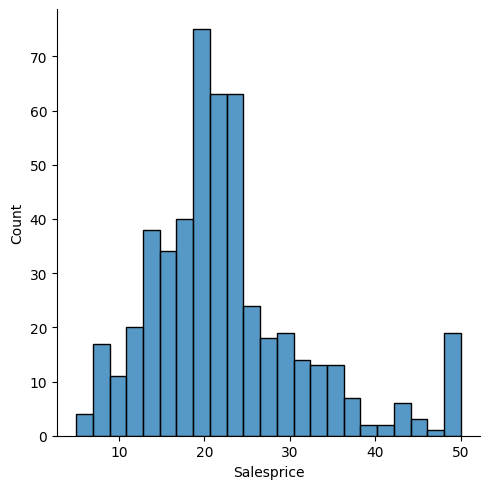

In [ ]:
sns.displot(data["Salesprice"])

In [ ]:
print('Skeeness: %f' % data['Salesprice'].skew())
print('Kurtosis: %f' % data['Salesprice'].kurt())

Skeeness: 1.108098
Kurtosis: 1.495197


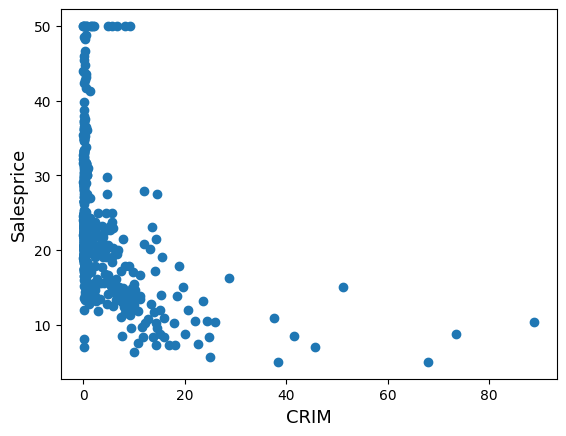

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['Salesprice'])
plt.ylabel('Salesprice', fontsize = 13)
plt.xlabel('CRIM', fontsize = 13)
plt.show()

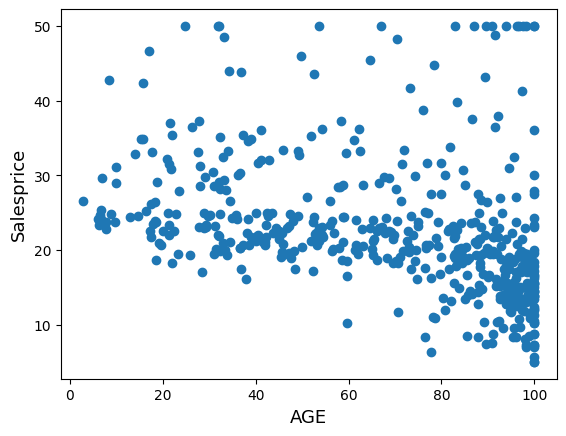

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['Salesprice'])
plt.ylabel('Salesprice', fontsize = 13)
plt.xlabel('AGE', fontsize = 13)
plt.show()

<ipython-input-39-09b5dafa569b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salesprice'], fit= norm);



 mu = 22.53 and sigma = 9.188012



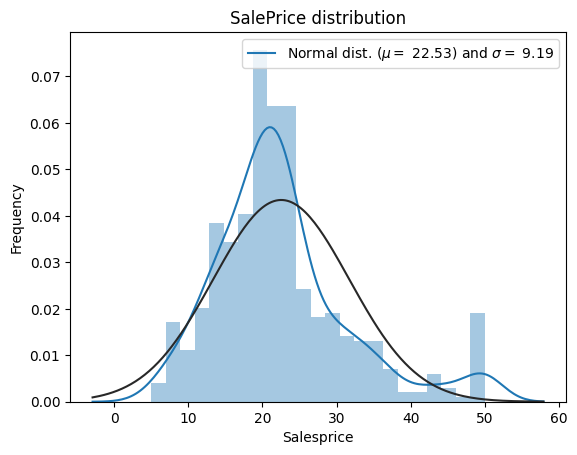

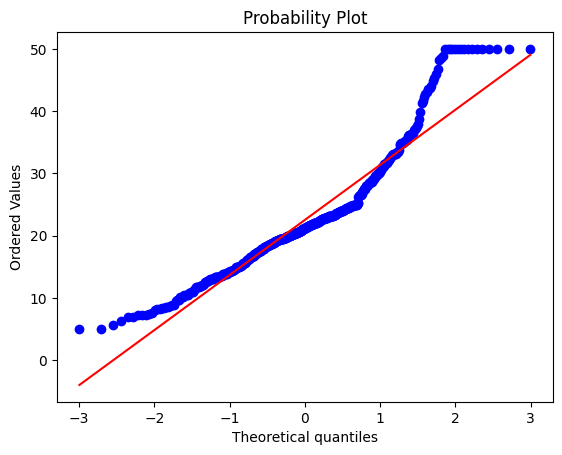

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(data['Salesprice'], fit= norm);

(mu, sigma) = norm.fit(data['Salesprice'])
print('\n mu = {:.2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f}) and $\sigma=$ {:.2f}'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['Salesprice'], plot=plt)
plt.show()

<ipython-input-40-d28851c09a86>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salesprice'], fit= norm);



 mu = 3.09 and sigma = 0.386583



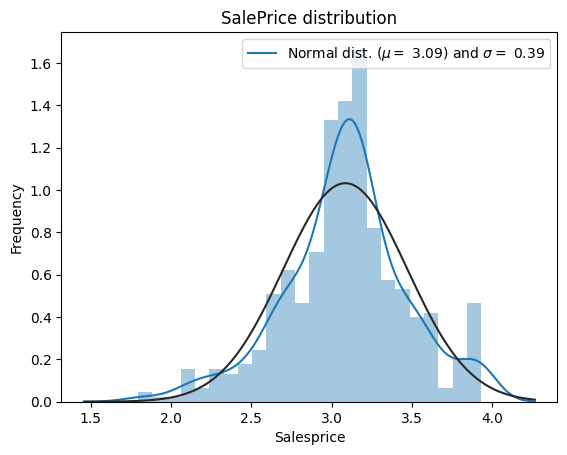

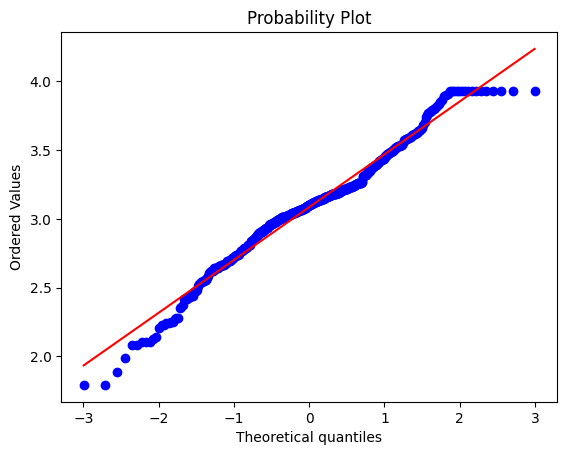

In [ ]:
data['Salesprice'] = np.log1p(data['Salesprice'])

sns.distplot(data['Salesprice'], fit= norm);

(mu, sigma) = norm.fit(data['Salesprice'])
print('\n mu = {:.2f} and sigma = {:2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f}) and $\sigma=$ {:.2f}'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['Salesprice'], plot=plt)
plt.show()

## **Data Correlation**

<function matplotlib.pyplot.show(close=None, block=None)>

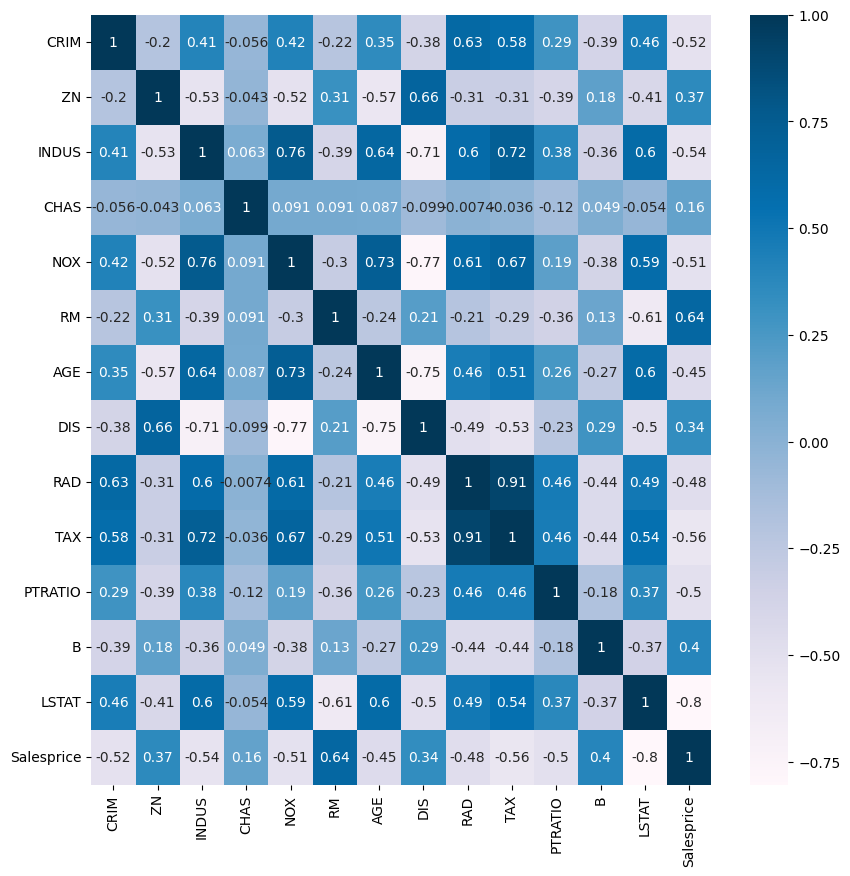

In [ ]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show

In [ ]:
cor_target = abs(cor['Salesprice'])
relevant_features = cor_target[cor_target>0.2]
names = [index for index, value in relevant_features.iteritems()]
names.remove('Salesprice')
print(names)
print(len(names))

['CRIM', ' ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


<ipython-input-43-887cb48410f3>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [index for index, value in relevant_features.iteritems()]


## **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop("Salesprice", axis=1)
y = data["Salesprice"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(x_test)

print("Actual value of the house :", y_test[0])
print("Model predicted value :", predictions[0])

Actual value of the house : 3.2188758248682006
Model predicted value : 3.3668949799969594


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)

0.18795843289241473
